# 📦 Amazon Top 50 Bestselling Books Data Analysis with Python

This project is an exploratory data analysis (EDA) and visualization of the Amazon Top 50 Bestselling Books dataset, using Python libraries such as pandas, matplotlib, and seaborn. It aims to uncover insights like popular genres, top authors, pricing patterns, and relationships between ratings and reviews.


## 📊 Data Loading and Initial Exploration


In [2]:
import pandas as pd
import os
file_path = 'C:/Users/hanib/OneDrive/Desktop/bestsellers_with_categories_2022_03_27.csv'
df = pd.read_csv(file_path)

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


## 📁 Dataset Information

The dataset contains information on Amazon top 50 best selling books including:
- Title/Name
- Author
- User rating and reviews
- Published year and price
- Genres

I'll clean missing values and analyze content trends.


In [3]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [4]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
df['user_rating'] = pd.to_numeric(df['user_rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce').astype('Int64')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')

# Optional: convert 'genre' to a categorical type
df['genre'] = df['genre'].astype('category')

# 3. Remove duplicate entries based on (name, year)
# Keep the first occurrence of duplicates
df = df.drop_duplicates(subset=['name', 'year'], keep='first')

# Final cleaned DataFrame
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         697 non-null    object  
 1   author       697 non-null    object  
 2   user_rating  697 non-null    float64 
 3   reviews      697 non-null    Int64   
 4   price        697 non-null    int64   
 5   year         697 non-null    Int64   
 6   genre        697 non-null    category
dtypes: Int64(2), category(1), float64(1), int64(1), object(2)
memory usage: 40.3+ KB
None


,name,author,user_rating,reviews,price,year,genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


The dataset is clean with no missing values, so we can proceed with exploratory data analysis to uncover patterns and insights.
## 📈 Exploratory Data Analysis

##  1. Most Frequent Authors
Let's find out which authors appear most frequently in the dataset.

In [3]:
top_authors = df['Author'].value_counts().head(10)

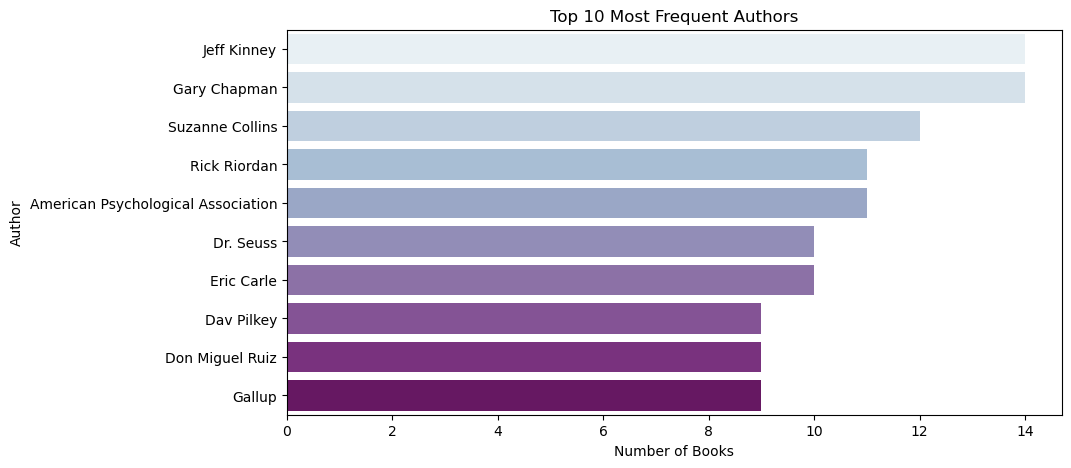

In [4]:
#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
author_df = top_authors.reset_index()
author_df.columns = ['Author', 'Count']
plt.figure(figsize=(10, 5))
colors = sns.color_palette('BuPu', n_colors=len(author_df))
sns.barplot(data=author_df, x='Count', y='Author', hue='Author', dodge=False, palette=colors, legend=False)
plt.title('Top 10 Most Frequent Authors')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

## 📚 2. Genre Distribution

Visualizing how genres are distributed in the dataset.


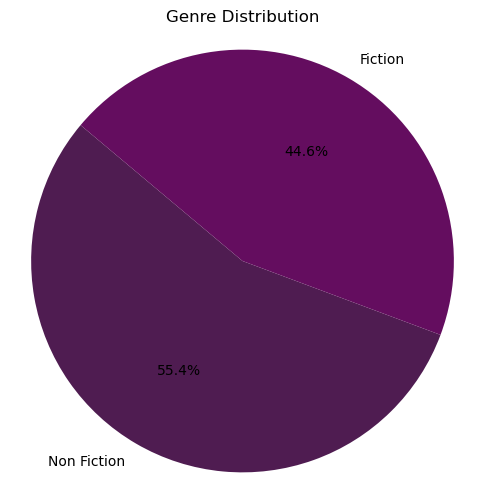

In [5]:
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4F1C51','#640D5F'])
plt.title('Genre Distribution')
plt.axis('equal')
plt.show()


## 💸 3. Price Distribution and Trends
Exploring how book prices vary.


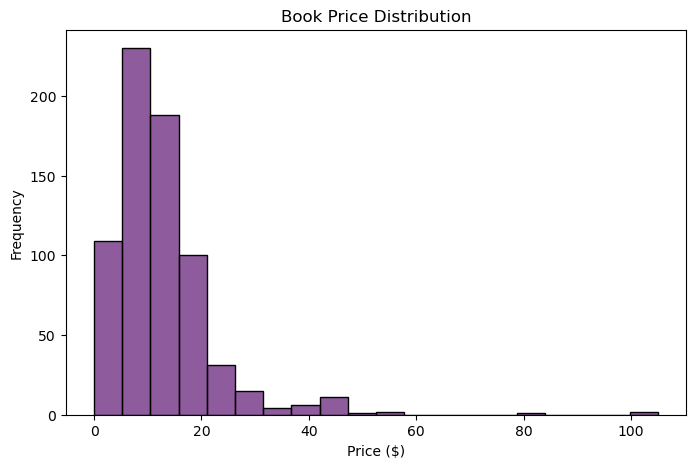

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=20, color='#69247C')
plt.title('Book Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


## ⭐ 4. User Ratings Analysis
Analysing the distribution of user ratings.


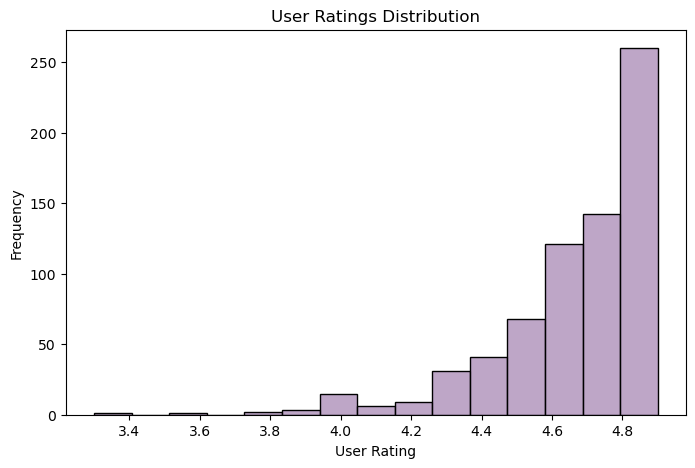

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['User Rating'], bins=15, color='#A888B5')
plt.title('User Ratings Distribution')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()


## 📝 5. Relationship Between Reviews and Ratings

Checking if there's a relationship between the number of reviews and user ratings.


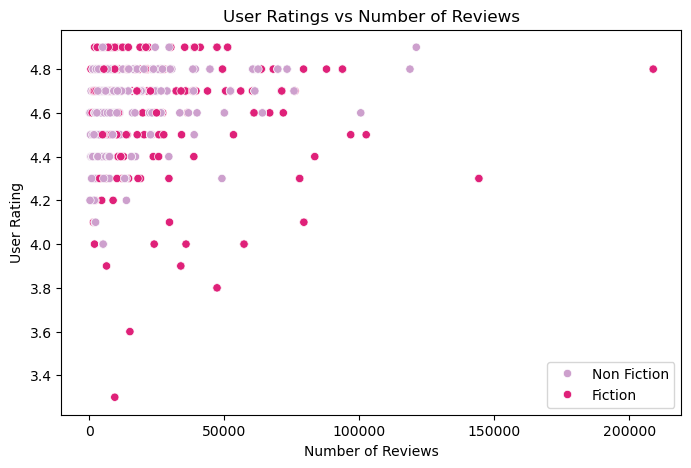

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Reviews', y='User Rating', hue='Genre', palette='PuRd')
plt.title('User Ratings vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User Rating')
plt.legend()
plt.show()


## 📅 6. Year-wise Publishing Trends

Looking at the number of bestselling books by year.


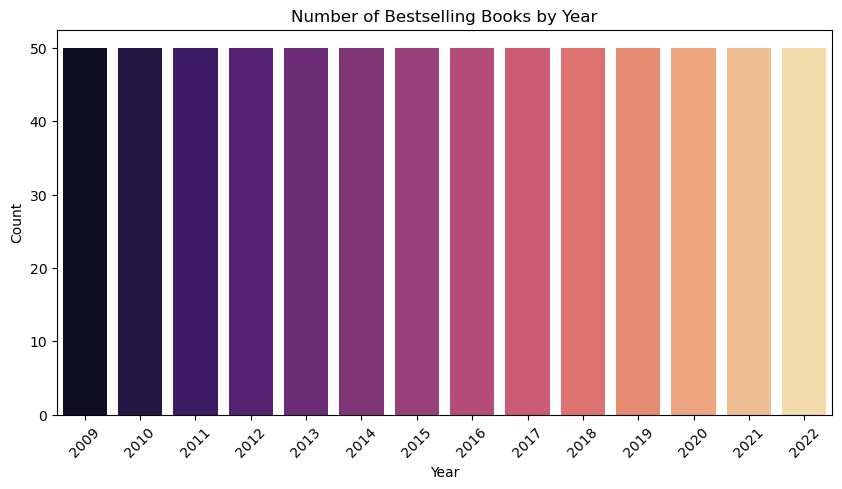

In [9]:
plt.figure(figsize=(10,5))
unique_years = df['Year'].nunique()
colors = sns.color_palette('magma', n_colors=unique_years)
sns.countplot(data=df, x='Year', hue='Year', dodge=False, palette=colors, legend=False)
plt.title('Number of Bestselling Books by Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## 🔍 7. Top Performing Books by Ratings and Reviews

Let’s find out the top 5 books based on ratings and reviews.


In [10]:
top_rated = df.sort_values(by='User Rating', ascending=False).drop_duplicates('Name').head(5)
top_reviewed = df.sort_values(by='Reviews', ascending=False).drop_duplicates('Name').head(5)

print("Top 5 Books by User Rating:")
display(top_rated[['Name', 'Author', 'User Rating']])

print("\nTop 5 Books by Number of Reviews:")
display(top_reviewed[['Name', 'Author', 'Reviews']])


Top 5 Books by User Rating:


,Name,Author,User Rating
605,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9
607,Call Us What We Carry: Poems,Amanda Gorman,4.9
457,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9
456,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9
223,"Oh, the Places You'll Go!",Dr. Seuss,4.9



Top 5 Books by Number of Reviews:


,Name,Author,Reviews
699,Where the Crawdads Sing,Delia Owens,208917
689,The Midnight Library: A Novel,Matt Haig,144314
550,A Promised Land,Barack Obama,121109
553,Becoming,Michelle Obama,118767
589,The Silent Patient,Alex Michaelides,102544


## 📌 Key Insights

- **Genre Split:** Non-fiction dominates the dataset, but fiction also has a strong presence, indicating reader interest in both storytelling and informative content.

- **Top Authors:** Authors like Jeff Kinney, Suzanne Collins, and Stephenie Meyer appear multiple times, showing consistent popularity over the years.

- **Price Range:** Most bestselling books are priced between $5–$15. Outliers exist, but affordability seems linked to popularity.

- **Ratings vs Reviews:** Almost all books have ratings above 4.0, but the number of reviews varies drastically, indicating that high ratings alone don't guarantee review volume.

- **Trends Over Years:** The number of bestsellers varies slightly each year, with some years showing spikes, possibly due to blockbuster series releases or seasonal trends.

- **Top Books:** Some books repeatedly appear across years, showcasing sustained popularity rather than one-time success.
